# Exploratory Data Analysis for Uber rides

### Data file contains data from uber pickups in New York during 2014. 
### Data obtained from NYC Taxi & Limousine Commission (TLC)

# Loading dependencies, Data and Feature engineering

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


data = pd.read_csv('uber-raw-data-apr14.csv') 
data.tail( )

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [6]:
# About half a million rows
print("Number of rows we have in our data : {}".format(data.shape[0]))

Number of rows we have in our data : 564516


In [7]:
#Has 4 features. with 0 missing value

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
Date/Time    564516 non-null object
Lat          564516 non-null float64
Lon          564516 non-null float64
Base         564516 non-null object
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [8]:
# The date/time column is an object(string). Best convert it to Pandas datetime.
# Took some time to execute. 

data['Date/Time'] = pd.to_datetime(data['Date/Time'])


In [9]:
# Pandas/Python datetime is easier to work with and provides a lot of functionalities.
# To explore a few:

dt = data.loc[564510, 'Date/Time']
print(dt)
print("The datatype for Date/Time column: {}".format(type(dt)))
print("The year is: {}".format(dt.year))
print("The month is: {}".format(dt.month))
print("Is leap year : {}".format(dt.is_leap_year))
print("Day of the year : {}".format(dt.dayofyear))

2014-04-30 23:18:00
The datatype for Date/Time column: <class 'pandas._libs.tslib.Timestamp'>
The year is: 2014
The month is: 4
Is leap year : False
Day of the year : 120


In [10]:
# Creating of the datetime feature allows us to engineer new features.
# We create two new features: 
# 1. Day of week.
# 2. Is week day. 
# 3. Hour of day

data['day_of_week'] = list(map(lambda x: x.dayofweek, data['Date/Time']))

data['is_weekday'] = list(map(lambda x: True if x in (1,2,3,4,5) else False, data['day_of_week']))

data['hour'] = list(map(lambda x: x.hour, data['Date/Time']))

In [11]:
#Lets check the new features together.

data.loc[:,['day_of_week', 'is_weekday','hour']].tail()

,day_of_week,is_weekday,hour
564511,2,True,23
564512,2,True,23
564513,2,True,23
564514,2,True,23
564515,2,True,23


### Exploring the data

##### Lets explore the distributions of the newly created features. 


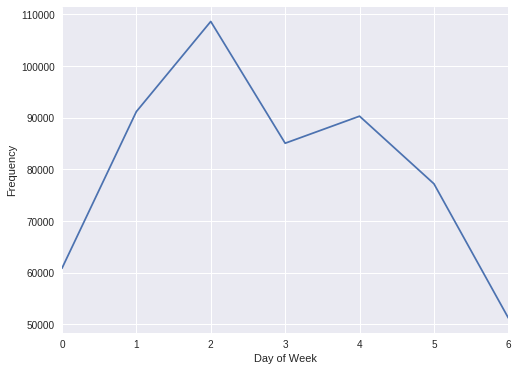

In [12]:
# Day of week. 

plt.figure(figsize=(8,6))
data['day_of_week'].value_counts().sort_index().plot()
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

# The most amount of rides recorded are on tuesday.
# Overall there are more rides taken on weekdays and very few on weekends. 

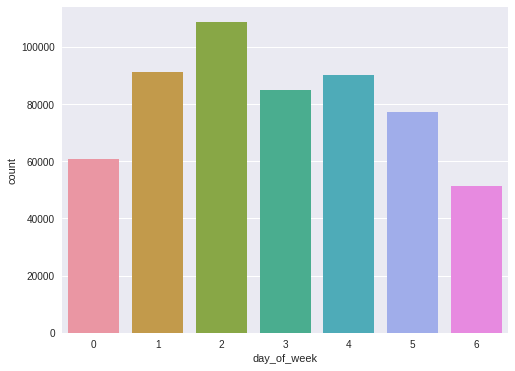

In [13]:
# Yep. More rides on weekdays. Probably due to office commutes. 

plt.figure(figsize=(8,6))
sns.countplot(data['day_of_week'])

In [14]:
# Lets see how rides are divivded in day of weeks with numbers. 

data['day_of_week'].value_counts()

2    108631
1     91185
4     90303
3     85067
5     77218
0     60861
6     51251
Name: day_of_week, dtype: int64

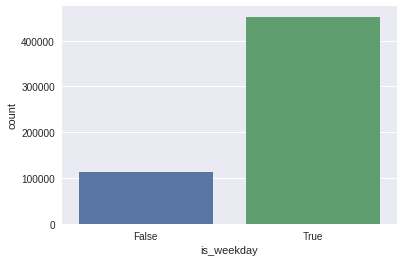

In [15]:
# Lets proceed to check is_weekday. 

#Count of values in is_weekday
sns.countplot(data['is_weekday'])

#This further explains the story of more rides during week days and fewer during weekends. 


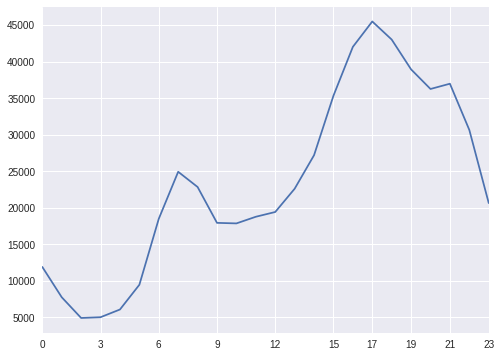

In [16]:
# Moving to analyzing Hours. 

plt.figure(figsize=(8,6))
data['hour'].value_counts().sort_index().plot(xticks = [0, 3, 6, 9, 12, 15, 17, 19, 21, 23])

#### The trend in the above histogram can be explained intuitively. 
#### The trend has two peaks. 
#### 1. Indicates people commuting to there workplace in the morning from 8-9am.
#### 2. Indicates people returning from work in the evening from 5-7pm. 

In [17]:
# Further analysis of days and hours.

pd.crosstab(data['hour'], data['day_of_week'])

day_of_week,0,1,2,3,4,5,6
hour,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


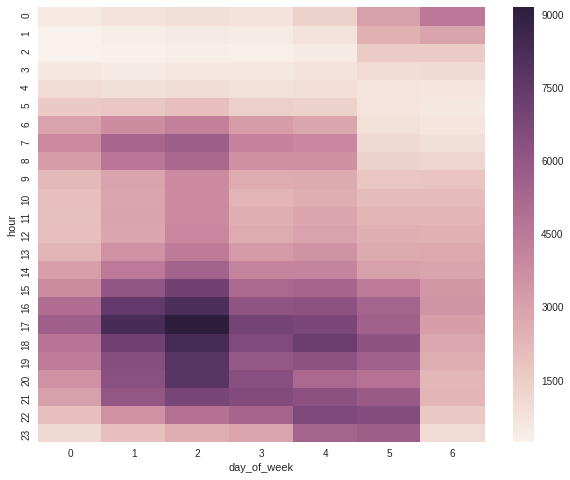

In [18]:
#Lets plot the crosstab from above.

plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(data['hour'], data['day_of_week']))

# Tells the same story. 

### Thank you. 
#### For now. 
#### Hoping to work on a few geospatial plots in the future for this notebook.